<a href="https://colab.research.google.com/github/Rick-Feng-u/Stock_Analysis/blob/main/All_day_combination_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import important libs**

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
!pip install loguru
from loguru import logger
import matplotlib.pyplot as plt
import numpy
import math
from decimal import Decimal
plt.style.use('ggplot')

**File load in**

In [ ]:
# from google.colab import files
# uploaded = files.upload()

**From here CSV file will be maniplulated using Pandas**



In [ ]:
df = pd.read_csv('spy20191217-20200508.csv' , parse_dates=True , index_col=0)

### Visualiztion of three graphs

**Open/Close:**

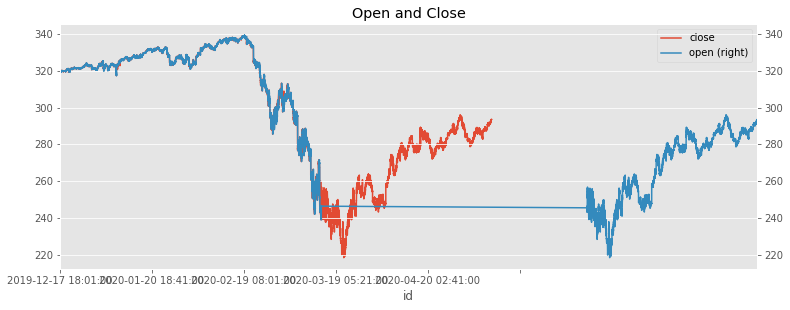

In [ ]:
ax = df.plot( x = "datetime", y = "close")
ax2 = df.plot(secondary_y = True, y = 'open' , ax=ax, figsize=(12.5, 4.5));
plt.title("Open and Close")
plt.show()

**High/Low:**

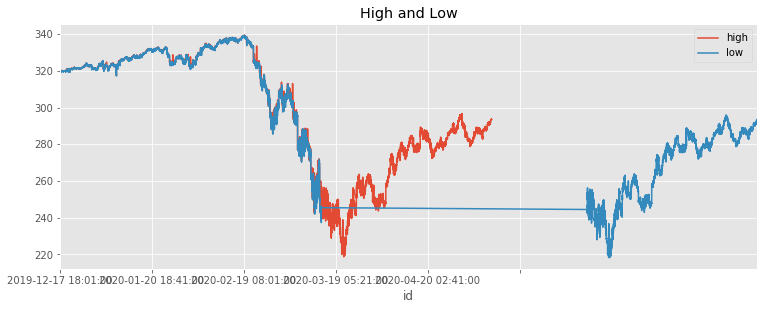

<Figure size 900x324 with 0 Axes>

In [ ]:
ax = df.plot( x = "datetime", y = 'high')
ax2 = df.plot(secondary_y = False, y = 'low' , ax = ax, figsize=(12.5, 4.5));
plt.title("High and Low")
plt.show()

**Volume:**

<Figure size 900x324 with 0 Axes>

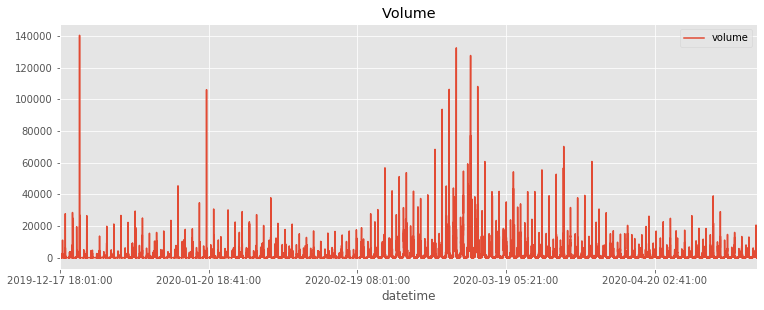

In [ ]:
plt.figure(figsize=(12.5, 4.5))
df.plot( x = "datetime", y = 'volume', figsize=(12.5, 4.5));
plt.title("Volume")
plt.show()

### Manipulation


*Many of these code are copying from spy-backtest-combined*

**this section is to locolize the time since these time are east coast time**

In [ ]:
df['dti'] = pd.DatetimeIndex(df['datetime']).tz_localize('Etc/GMT+5').tz_convert('Etc/GMT-5')
#           using column 'datetime'                            convert into PST
df.head()


,datetime,symbol_id,open,high,low,close,volume,dti
id,,,,,,,,
11,2019-12-17 18:01:00,1,319.69,319.69,319.69,319.69,3,2019-12-18 04:01:00+05:00
12,2019-12-17 18:02:00,1,319.69,319.69,319.69,319.69,0,2019-12-18 04:02:00+05:00
13,2019-12-17 18:03:00,1,319.69,319.69,319.69,319.69,0,2019-12-18 04:03:00+05:00
14,2019-12-17 18:04:00,1,319.69,319.69,319.69,319.69,0,2019-12-18 04:04:00+05:00
15,2019-12-17 18:05:00,1,319.69,319.69,319.69,319.69,0,2019-12-18 04:05:00+05:00


**Instead of ID being the index, this section turns the localized time into index**

In [ ]:
#set dti into index
df_minutes = df.set_index(pd.DatetimeIndex(df['dti']))
#rename the column into 'Date'
df_minutes.index.name = 'Date'
df_minutes.head()

,datetime,symbol_id,open,high,low,close,volume,dti
Date,,,,,,,,
2019-12-18 04:01:00+05:00,2019-12-17 18:01:00,1,319.69,319.69,319.69,319.69,3,2019-12-18 04:01:00+05:00
2019-12-18 04:02:00+05:00,2019-12-17 18:02:00,1,319.69,319.69,319.69,319.69,0,2019-12-18 04:02:00+05:00
2019-12-18 04:03:00+05:00,2019-12-17 18:03:00,1,319.69,319.69,319.69,319.69,0,2019-12-18 04:03:00+05:00
2019-12-18 04:04:00+05:00,2019-12-17 18:04:00,1,319.69,319.69,319.69,319.69,0,2019-12-18 04:04:00+05:00
2019-12-18 04:05:00+05:00,2019-12-17 18:05:00,1,319.69,319.69,319.69,319.69,0,2019-12-18 04:05:00+05:00


**Select business date from the column date**

*Its easier to resample them later into string so later section can use time selecter or grouper*

In [ ]:
business = df_minutes.resample('B')
df_date_data = [ str(name.date()) 
      for name, group in business ]
df_date_data[0]

'2019-12-18'

*experenmental code for dividing dataframe*

In [ ]:
sell_Percentage = 0.5
bail_Percentage = 0.5
Fund = 100000

len(df_minutes['2019-12-18'])

result = [group[1] for group in df_minutes.groupby(df_minutes.index.hour)]
result[1]

,datetime,symbol_id,open,high,low,close,volume,dti
Date,,,,,,,,
2019-12-18 05:00:00+05:00,2019-12-17 19:00:00,1,319.87,319.87,319.87,319.87,0,2019-12-18 05:00:00+05:00
2019-12-18 05:01:00+05:00,2019-12-17 19:01:00,1,319.87,319.87,319.87,319.87,0,2019-12-18 05:01:00+05:00
2019-12-18 05:02:00+05:00,2019-12-17 19:02:00,1,319.87,319.87,319.87,319.87,0,2019-12-18 05:02:00+05:00
2019-12-18 05:03:00+05:00,2019-12-17 19:03:00,1,319.87,319.87,319.87,319.87,0,2019-12-18 05:03:00+05:00
2019-12-18 05:04:00+05:00,2019-12-17 19:04:00,1,319.87,319.87,319.87,319.87,0,2019-12-18 05:04:00+05:00
...,...,...,...,...,...,...,...,...
2020-05-08 05:55:00+05:00,2020-05-07 19:55:00,1,291.30,291.32,291.30,291.32,6,2020-05-08 05:55:00+05:00
2020-05-08 05:56:00+05:00,2020-05-07 19:56:00,1,291.38,291.46,291.38,291.46,12,2020-05-08 05:56:00+05:00
2020-05-08 05:57:00+05:00,2020-05-07 19:57:00,1,291.48,291.48,291.48,291.48,3,2020-05-08 05:57:00+05:00


**Remove all non business hour from the date**

In [ ]:
start_trading_time_everyday = '09:30:00'
end_trading_time_everyday = '15:59:59'
time_zone = '+05:00'

def get_inhours_data(data, start_time, end_time, time_zone):
    inhour_spy_data_in_minutes = []
    inhour_spy_data_in_minutes_dict = {}
    
    for date in df_date_data:
        time_selector_start = date +' ' +start_time +time_zone
        time_selector_end = date +' ' +end_time +time_zone
#     print('Trading time:{} -> {}'.format(time_selector_start, time_selector_end))
    
        data_selected = data[time_selector_start:time_selector_end].copy()
        if not data_selected.empty:
            inhour_spy_data_in_minutes.append(data_selected)
            inhour_spy_data_in_minutes_dict.update( {date:data_selected} )
            
    return inhour_spy_data_in_minutes
    
inhours_spy_data_in_minutes=[]
inhours_spy_data_in_minutes = get_inhours_data(df_minutes, start_trading_time_everyday, end_trading_time_everyday, time_zone)

everyday_inhours_spy_data_lenth = [ len(df.index)  for df in inhours_spy_data_in_minutes]
logger.info('The length of In-hours SPY Data in everyday is {}.'.format(everyday_inhours_spy_data_lenth))

# concate in-hours data into one in a Dataframe.
spy_data_in_minutes = pd.concat(inhours_spy_data_in_minutes)
spy_data_in_minutes = spy_data_in_minutes.dropna(axis=0)
logger.info( 'Totally we have [ {} ] lines of In-hours SPY Data in minutes'.format(len(spy_data_in_minutes.index)) )


2020-08-20 16:57:26.092 | INFO     | __main__:<module>:25 - The length of In-hours SPY Data in everyday is [390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390].
2020-08-20 16:57:26.133 | INFO     | __main__:<module>:30 - Totally we have [ 38220 ] lines of In-hours SPY Data in minutes


**EMA Calculation**

In [ ]:
def calculate_EMA(price_list, period):
    # Calculate standard aplha
    standard_alpha = 2.0 / float( period + 1.0 )
    
    # fill the first day/ day 1 EMA with a SMA, and use it as the first EMAyesterday.
    EMA_firstday = sum(price_list[:2]) / 2
#     EMA_firstday = sum(price_list[:period]) / period
#     EMA_firstday = price_list[0]
    EMA_Values = [round(EMA_firstday, 3)]
    EMA_yesterday = EMA_firstday
    
    # Evaluating the day 2 to day N EMA.
    for price_today in price_list[1:]:
        EMA_today = standard_alpha * (price_today - EMA_yesterday) + EMA_yesterday
        EMA_Values.append( round(EMA_today, 3) )
        EMA_yesterday = EMA_today
        
    return EMA_Values

**Resample the data via EMA**

In [ ]:
def resample_data_in_given_period(data, period):
    # Build data in given time period
    resampled_data = data.resample(period)
    name_in_resampled_group = [ name for name, group in resampled_data ]
    # print(type(name_in_resampled_group[0]))
    # print( str(name_in_resampled_group[0] ))
     
    index_in_resampled_data = [ name for name in name_in_resampled_group]
    
    rtn_data = pd.DataFrame(columns=['date', 'high', 'low', 'open', 'close', 'volume', 'return'], index=pd.DatetimeIndex( index_in_resampled_data ))
    rtn_data['date'] = index_in_resampled_data
    rtn_data.index.name = 'Date'
    
    rtn_data['high'] = resampled_data['high'].max().values.copy()
    rtn_data['low'] = resampled_data['low'].min().values.copy()
    rtn_data['open'] = resampled_data['open'].first().values.copy()
    rtn_data['close'] = resampled_data['close'].last().values.copy()

    rtn_data['volume'] = resampled_data['volume'].sum().values.copy()
    
    rtn_data['return'] = rtn_data['close'].pct_change().copy()
    rtn_data['return'] = rtn_data['return'].fillna(0)
    
    # calculating log returns and volatility
    rtn_data['logret'] = np.log(rtn_data['close'] / rtn_data['close'].shift(1))
    rtn_data['logret'] = rtn_data['logret'].fillna(0)
    
#     rtn_data['volatility'] = rtn_data['logret'].rolling(window=21).std() * np.sqrt(252)
#     rtn_data['volatility'] = rtn_data['volatility'].fillna(0)

    rtn_data = rtn_data.dropna(axis=0)
    
    return rtn_data


**Cleaned Data**

In [ ]:
data_cleaned = df_minutes.drop(['symbol_id', 'dti'], axis=1)
# data_cleaned = df_minutes.drop(['symbol_id', 'datetime', 'dti'], axis=1)
data_cleaned.head()

,datetime,open,high,low,close,volume
Date,,,,,,
2019-12-18 04:01:00+05:00,2019-12-17 18:01:00,319.69,319.69,319.69,319.69,3
2019-12-18 04:02:00+05:00,2019-12-17 18:02:00,319.69,319.69,319.69,319.69,0
2019-12-18 04:03:00+05:00,2019-12-17 18:03:00,319.69,319.69,319.69,319.69,0
2019-12-18 04:04:00+05:00,2019-12-17 18:04:00,319.69,319.69,319.69,319.69,0
2019-12-18 04:05:00+05:00,2019-12-17 18:05:00,319.69,319.69,319.69,319.69,0


**Resample data with different period**

*2 minutes*

In [ ]:
given_time_frame = '2T'
df_resamples_2Min = resample_data_in_given_period(data_cleaned, given_time_frame)
df_resamples_2Min.head


<bound method NDFrame.head of                                                date    high     low    open  \
Date                                                                          
2019-12-18 04:00:00+05:00 2019-12-18 04:00:00+05:00  319.69  319.69  319.69   
2019-12-18 04:02:00+05:00 2019-12-18 04:02:00+05:00  319.69  319.69  319.69   
2019-12-18 04:04:00+05:00 2019-12-18 04:04:00+05:00  319.69  319.69  319.69   
2019-12-18 04:06:00+05:00 2019-12-18 04:06:00+05:00  319.69  319.69  319.69   
2019-12-18 04:08:00+05:00 2019-12-18 04:08:00+05:00  319.69  319.69  319.69   
...                                             ...     ...     ...     ...   
2020-05-09 09:50:00+05:00 2020-05-09 09:50:00+05:00  293.66  293.62  293.62   
2020-05-09 09:52:00+05:00 2020-05-09 09:52:00+05:00  293.66  293.65  293.66   
2020-05-09 09:54:00+05:00 2020-05-09 09:54:00+05:00  293.72  293.66  293.72   
2020-05-09 09:56:00+05:00 2020-05-09 09:56:00+05:00  293.65  293.65  293.65   
2020-05-09 09:58:00+05

*3 minutes*

In [ ]:
given_time_frame = '3T'
df_resamples_3Min = resample_data_in_given_period(data_cleaned, given_time_frame)
df_resamples_3Min.head

<bound method NDFrame.head of                                                date    high     low    open  \
Date                                                                          
2019-12-18 04:00:00+05:00 2019-12-18 04:00:00+05:00  319.69  319.69  319.69   
2019-12-18 04:03:00+05:00 2019-12-18 04:03:00+05:00  319.69  319.69  319.69   
2019-12-18 04:06:00+05:00 2019-12-18 04:06:00+05:00  319.69  319.69  319.69   
2019-12-18 04:09:00+05:00 2019-12-18 04:09:00+05:00  319.69  319.69  319.69   
2019-12-18 04:12:00+05:00 2019-12-18 04:12:00+05:00  319.69  319.69  319.69   
...                                             ...     ...     ...     ...   
2020-05-09 09:45:00+05:00 2020-05-09 09:45:00+05:00  293.61  293.60  293.61   
2020-05-09 09:48:00+05:00 2020-05-09 09:48:00+05:00  293.62  293.62  293.62   
2020-05-09 09:51:00+05:00 2020-05-09 09:51:00+05:00  293.66  293.65  293.66   
2020-05-09 09:54:00+05:00 2020-05-09 09:54:00+05:00  293.72  293.65  293.72   
2020-05-09 09:57:00+05

*5 minutes*

In [ ]:
given_time_frame = '5T'
df_resamples_5Min = resample_data_in_given_period(data_cleaned, given_time_frame)
df_resamples_5Min.head

<bound method NDFrame.head of                                                date    high     low    open  \
Date                                                                          
2019-12-18 04:00:00+05:00 2019-12-18 04:00:00+05:00  319.69  319.69  319.69   
2019-12-18 04:05:00+05:00 2019-12-18 04:05:00+05:00  319.69  319.69  319.69   
2019-12-18 04:10:00+05:00 2019-12-18 04:10:00+05:00  319.69  319.69  319.69   
2019-12-18 04:15:00+05:00 2019-12-18 04:15:00+05:00  319.69  319.64  319.69   
2019-12-18 04:20:00+05:00 2019-12-18 04:20:00+05:00  319.67  319.64  319.64   
...                                             ...     ...     ...     ...   
2020-05-09 09:35:00+05:00 2020-05-09 09:35:00+05:00  293.64  293.64  293.64   
2020-05-09 09:40:00+05:00 2020-05-09 09:40:00+05:00  293.68  293.61  293.62   
2020-05-09 09:45:00+05:00 2020-05-09 09:45:00+05:00  293.62  293.60  293.61   
2020-05-09 09:50:00+05:00 2020-05-09 09:50:00+05:00  293.72  293.62  293.62   
2020-05-09 09:55:00+05

*10 minutes*

In [ ]:
given_time_frame = '10T'
df_resamples_10Min = resample_data_in_given_period(data_cleaned, given_time_frame)
df_resamples_10Min.head

<bound method NDFrame.head of                                                date    high     low    open  \
Date                                                                          
2019-12-18 04:00:00+05:00 2019-12-18 04:00:00+05:00  319.69  319.69  319.69   
2019-12-18 04:10:00+05:00 2019-12-18 04:10:00+05:00  319.69  319.64  319.69   
2019-12-18 04:20:00+05:00 2019-12-18 04:20:00+05:00  319.77  319.64  319.64   
2019-12-18 04:30:00+05:00 2019-12-18 04:30:00+05:00  319.84  319.77  319.77   
2019-12-18 04:40:00+05:00 2019-12-18 04:40:00+05:00  319.84  319.79  319.82   
...                                             ...     ...     ...     ...   
2020-05-08 18:30:00+05:00 2020-05-08 18:30:00+05:00  293.45  293.37  293.40   
2020-05-08 18:40:00+05:00 2020-05-08 18:40:00+05:00  293.48  293.41  293.46   
2020-05-09 09:30:00+05:00 2020-05-09 09:30:00+05:00  293.64  293.64  293.64   
2020-05-09 09:40:00+05:00 2020-05-09 09:40:00+05:00  293.68  293.60  293.62   
2020-05-09 09:50:00+05

*15 minutes*

In [ ]:
given_time_frame = '15T'
df_resamples_15Min = resample_data_in_given_period(data_cleaned, given_time_frame)
df_resamples_15Min.head

<bound method NDFrame.head of                                                date    high     low    open  \
Date                                                                          
2019-12-18 04:00:00+05:00 2019-12-18 04:00:00+05:00  319.69  319.69  319.69   
2019-12-18 04:15:00+05:00 2019-12-18 04:15:00+05:00  319.77  319.64  319.69   
2019-12-18 04:30:00+05:00 2019-12-18 04:30:00+05:00  319.84  319.77  319.77   
2019-12-18 04:45:00+05:00 2019-12-18 04:45:00+05:00  319.87  319.79  319.79   
2019-12-18 05:00:00+05:00 2019-12-18 05:00:00+05:00  319.89  319.83  319.87   
...                                             ...     ...     ...     ...   
2020-05-08 18:15:00+05:00 2020-05-08 18:15:00+05:00  293.45  293.40  293.42   
2020-05-08 18:30:00+05:00 2020-05-08 18:30:00+05:00  293.48  293.37  293.40   
2020-05-08 18:45:00+05:00 2020-05-08 18:45:00+05:00  293.48  293.44  293.48   
2020-05-09 09:30:00+05:00 2020-05-09 09:30:00+05:00  293.68  293.61  293.64   
2020-05-09 09:45:00+05

*20 minutes*

In [ ]:
given_time_frame = '20T'
df_resamples_20Min = resample_data_in_given_period(data_cleaned, given_time_frame)
df_resamples_20Min.head

<bound method NDFrame.head of                                                date    high     low    open  \
Date                                                                          
2019-12-18 04:00:00+05:00 2019-12-18 04:00:00+05:00  319.69  319.64  319.69   
2019-12-18 04:20:00+05:00 2019-12-18 04:20:00+05:00  319.84  319.64  319.64   
2019-12-18 04:40:00+05:00 2019-12-18 04:40:00+05:00  319.87  319.79  319.82   
2019-12-18 05:00:00+05:00 2019-12-18 05:00:00+05:00  319.89  319.83  319.87   
2019-12-18 05:20:00+05:00 2019-12-18 05:20:00+05:00  319.85  319.80  319.83   
...                                             ...     ...     ...     ...   
2020-05-08 18:00:00+05:00 2020-05-08 18:00:00+05:00  293.45  293.30  293.30   
2020-05-08 18:20:00+05:00 2020-05-08 18:20:00+05:00  293.45  293.37  293.44   
2020-05-08 18:40:00+05:00 2020-05-08 18:40:00+05:00  293.48  293.41  293.46   
2020-05-09 09:20:00+05:00 2020-05-09 09:20:00+05:00  293.64  293.64  293.64   
2020-05-09 09:40:00+05

*30 minutes*

In [ ]:
given_time_frame = '30T'
df_resamples_30Min = resample_data_in_given_period(data_cleaned, given_time_frame)
df_resamples_30Min.head

<bound method NDFrame.head of                                                date    high     low    open  \
Date                                                                          
2019-12-18 04:00:00+05:00 2019-12-18 04:00:00+05:00  319.77  319.64  319.69   
2019-12-18 04:30:00+05:00 2019-12-18 04:30:00+05:00  319.87  319.77  319.77   
2019-12-18 05:00:00+05:00 2019-12-18 05:00:00+05:00  319.89  319.83  319.87   
2019-12-18 05:30:00+05:00 2019-12-18 05:30:00+05:00  319.88  319.80  319.85   
2019-12-18 06:00:00+05:00 2019-12-18 06:00:00+05:00  319.87  319.69  319.87   
...                                             ...     ...     ...     ...   
2020-05-08 17:00:00+05:00 2020-05-08 17:00:00+05:00  293.49  293.31  293.37   
2020-05-08 17:30:00+05:00 2020-05-08 17:30:00+05:00  293.49  292.44  293.39   
2020-05-08 18:00:00+05:00 2020-05-08 18:00:00+05:00  293.45  293.30  293.30   
2020-05-08 18:30:00+05:00 2020-05-08 18:30:00+05:00  293.48  293.37  293.40   
2020-05-09 09:30:00+05

*1 hour*

In [ ]:
given_time_frame = 'H'
df_resamples_1H = resample_data_in_given_period(data_cleaned, given_time_frame)
df_resamples_1H.head

<bound method NDFrame.head of                                                date    high     low    open  \
Date                                                                          
2019-12-18 04:00:00+05:00 2019-12-18 04:00:00+05:00  319.87  319.64  319.69   
2019-12-18 05:00:00+05:00 2019-12-18 05:00:00+05:00  319.89  319.80  319.87   
2019-12-18 06:00:00+05:00 2019-12-18 06:00:00+05:00  319.87  319.59  319.87   
2019-12-18 07:00:00+05:00 2019-12-18 07:00:00+05:00  319.82  319.50  319.69   
2019-12-18 08:00:00+05:00 2019-12-18 08:00:00+05:00  319.88  319.37  319.77   
...                                             ...     ...     ...     ...   
2020-05-08 15:00:00+05:00 2020-05-08 15:00:00+05:00  292.95  291.49  291.67   
2020-05-08 16:00:00+05:00 2020-05-08 16:00:00+05:00  293.54  291.67  292.47   
2020-05-08 17:00:00+05:00 2020-05-08 17:00:00+05:00  293.49  292.44  293.37   
2020-05-08 18:00:00+05:00 2020-05-08 18:00:00+05:00  293.48  293.30  293.30   
2020-05-09 09:00:00+05

*2 Hours*

In [ ]:
given_time_frame = '2H'
df_resamples_2H = resample_data_in_given_period(data_cleaned, given_time_frame)
df_resamples_2H.head

<bound method NDFrame.head of                                                date    high     low    open  \
Date                                                                          
2019-12-18 04:00:00+05:00 2019-12-18 04:00:00+05:00  319.89  319.64  319.69   
2019-12-18 06:00:00+05:00 2019-12-18 06:00:00+05:00  319.87  319.50  319.87   
2019-12-18 08:00:00+05:00 2019-12-18 08:00:00+05:00  320.20  319.37  319.77   
2019-12-18 10:00:00+05:00 2019-12-18 10:00:00+05:00  320.25  319.53  319.73   
2019-12-18 12:00:00+05:00 2019-12-18 12:00:00+05:00  320.02  319.76  319.81   
...                                             ...     ...     ...     ...   
2020-05-08 12:00:00+05:00 2020-05-08 12:00:00+05:00  292.05  290.76  291.72   
2020-05-08 14:00:00+05:00 2020-05-08 14:00:00+05:00  292.95  290.79  291.11   
2020-05-08 16:00:00+05:00 2020-05-08 16:00:00+05:00  293.54  291.67  292.47   
2020-05-08 18:00:00+05:00 2020-05-08 18:00:00+05:00  293.48  293.30  293.30   
2020-05-09 08:00:00+05

*4 hours*

In [ ]:
given_time_frame = '4H'
df_resamples_4H = resample_data_in_given_period(data_cleaned, given_time_frame)
df_resamples_4H.head

<bound method NDFrame.head of                                                date    high     low    open  \
Date                                                                          
2019-12-18 04:00:00+05:00 2019-12-18 04:00:00+05:00  319.89  319.50  319.69   
2019-12-18 08:00:00+05:00 2019-12-18 08:00:00+05:00  320.25  319.37  319.77   
2019-12-18 12:00:00+05:00 2019-12-18 12:00:00+05:00  320.07  319.53  319.81   
2019-12-18 16:00:00+05:00 2019-12-18 16:00:00+05:00  320.07  319.50  319.56   
2019-12-19 04:00:00+05:00 2019-12-19 04:00:00+05:00  320.11  319.59  319.92   
...                                             ...     ...     ...     ...   
2020-05-08 04:00:00+05:00 2020-05-08 04:00:00+05:00  291.74  290.43  291.00   
2020-05-08 08:00:00+05:00 2020-05-08 08:00:00+05:00  292.23  289.86  290.90   
2020-05-08 12:00:00+05:00 2020-05-08 12:00:00+05:00  292.95  290.76  291.72   
2020-05-08 16:00:00+05:00 2020-05-08 16:00:00+05:00  293.54  291.67  292.47   
2020-05-09 08:00:00+05

*1 day*

In [ ]:
given_time_frame = 'D'
df_resamples_1D = resample_data_in_given_period(data_cleaned, given_time_frame)
df_resamples_1D.head

<bound method NDFrame.head of                                                date    high     low    open  \
Date                                                                          
2019-12-18 00:00:00+05:00 2019-12-18 00:00:00+05:00  320.25  319.37  319.69   
2019-12-19 00:00:00+05:00 2019-12-19 00:00:00+05:00  321.24  319.43  319.92   
2019-12-20 00:00:00+05:00 2019-12-20 00:00:00+05:00  321.45  319.33  319.70   
2019-12-23 00:00:00+05:00 2019-12-23 00:00:00+05:00  321.98  321.06  321.34   
2019-12-24 00:00:00+05:00 2019-12-24 00:00:00+05:00  321.75  320.90  321.47   
...                                             ...     ...     ...     ...   
2020-05-05 00:00:00+05:00 2020-05-05 00:00:00+05:00  289.25  283.61  286.17   
2020-05-06 00:00:00+05:00 2020-05-06 00:00:00+05:00  288.96  282.70  287.76   
2020-05-07 00:00:00+05:00 2020-05-07 00:00:00+05:00  289.78  285.18  286.70   
2020-05-08 00:00:00+05:00 2020-05-08 00:00:00+05:00  293.54  289.86  291.00   
2020-05-09 00:00:00+05

*1 week*

In [ ]:
given_time_frame = 'W'
df_resamples_1W = resample_data_in_given_period(data_cleaned, given_time_frame)
df_resamples_1W.head

<bound method NDFrame.head of                                                date    high     low    open  \
Date                                                                          
2019-12-22 00:00:00+05:00 2019-12-22 00:00:00+05:00  321.45  319.33  319.69   
2019-12-29 00:00:00+05:00 2019-12-29 00:00:00+05:00  324.06  320.90  321.34   
2020-01-05 00:00:00+05:00 2020-01-05 00:00:00+05:00  325.25  319.69  323.11   
2020-01-12 00:00:00+05:00 2020-01-12 00:00:00+05:00  327.74  317.25  320.05   
2020-01-19 00:00:00+05:00 2020-01-19 00:00:00+05:00  332.18  325.71  326.67   
2020-01-26 00:00:00+05:00 2020-01-26 00:00:00+05:00  332.95  327.36  330.70   
2020-02-02 00:00:00+05:00 2020-02-02 00:00:00+05:00  329.00  320.73  325.61   
2020-02-09 00:00:00+05:00 2020-02-09 00:00:00+05:00  335.15  321.73  323.50   
2020-02-16 00:00:00+05:00 2020-02-16 00:00:00+05:00  338.24  331.06  331.77   
2020-02-23 00:00:00+05:00 2020-02-23 00:00:00+05:00  339.38  332.58  336.50   
2020-03-01 00:00:00+05

### Combination Calculation

**Percentage Combintaion On Closing price**

*Set up Dataframe which stores calculation result*

**Calculation result includes:**


1.   RR values
2.   Take Profit percentage
3.   Stop Lost Percentage
4.   Date/Time
5.   Current fund available
6.   Profit compare to initial funding


In [ ]:
result_Column_Name = ['datetime','RR','TPP','SLP','currentF','comparedProfit']
df_result = pd.DataFrame(columns = result_Column_Name)
print(df_result)

Empty DataFrame
Columns: [datetime, RR, TPP, SLP, currentF, comparedProfit]
Index: []


Percentage difference for 1 min

In [ ]:
one_Min_Max = data_cleaned['close'].max()
one_Min_Min = data_cleaned['close'].min()
TPP_1Min = 0
SLP_1Min = 0

minIndex = data_cleaned.loc[ data_cleaned['close'] == one_Min_Min].index[0]
maxIndex = data_cleaned.loc[ data_cleaned['close'] == one_Min_Max].index[0]
endIndex = data_cleaned[-1:].index[0]

if(minIndex < maxIndex):
  TPP_1Min = abs(one_Min_Max - one_Min_Min) / one_Min_Min
  SecondHalfDf = data_cleaned.loc[minIndex:endIndex]
  min_Of_SecondHalfDf = SecondHalfDf['close'].max()
  SLP_1Min = abs(min_Of_SecondHalfDf - one_Min_Max) / one_Min_Max
else:
  SLP_1Min = abs(one_Min_Min - one_Min_Max) / one_Min_Max
  SecondHalfDf = data_cleaned.loc[maxIndex:endIndex]
  max_Of_SecondHalfDf = SecondHalfDf['close'].max()
  TPP_1Min = abs(max_Of_SecondHalfDf - one_Min_Min) / one_Min_Min

print(TPP_1Min * 100)
print(SLP_1Min * 100)

#if (data_cleaned[data_cleaned['close'] == data_cleaned['close'].min()].index.values < data_cleaned[data_cleaned['close'] == data_cleaned['close'].max()].index.values):
#indexOfMax = data_cleaned.loc[ data_cleaned['close'] == one_Min_Max ].index[0]
#lastRecordIndex = data_cleaned[-1:].index[0]
#print(indexOfMax)

#minOfSecondHalfDf = data_cleaned.loc[minIndex:lastRecordIndex]
#minOfSecondHalfDf['close'].max()

#abs(one_Min_Max - one_Min_Min) / ((one_Min_Max + one_Min_Min) / 2)

55.34242812671671
35.62608670026228


Percentage difference for 2 mins

In [ ]:
two_Min_Max = df_resamples_2Min['close'].max()
two_Min_Min = df_resamples_2Min['close'].min()
TPP_2Min = 0
SLP_2Min = 0

minIndex = df_resamples_2Min.loc[ df_resamples_2Min['close'] == two_Min_Min].index[0]
maxIndex = df_resamples_2Min.loc[ df_resamples_2Min['close'] == two_Min_Max].index[0]
endIndex = df_resamples_2Min[-1:].index[0]

if(minIndex < maxIndex):
  TPP_2Min = abs(two_Min_Max - two_Min_Min) / two_Min_Min
  SecondHalfDf = df_resamples_2Min.loc[minIndex:endIndex]
  min_Of_SecondHalfDf = SecondHalfDf['close'].max()
  SLP_2Min = abs(min_Of_SecondHalfDf - two_Min_Max) / two_Min_Max
else:
  SLP_2Min = abs(two_Min_Min - two_Min_Max) / two_Min_Max
  SecondHalfDf = df_resamples_2Min.loc[maxIndex:endIndex]
  max_Of_SecondHalfDf = SecondHalfDf['close'].max()
  TPP_2Min = abs(max_Of_SecondHalfDf - two_Min_Min) / two_Min_Min

print(TPP_2Min * 100)
print(SLP_2Min * 100)

55.328694378319
35.620394930739764


Percentage difference for 3 min

In [ ]:
three_Min_Max = df_resamples_3Min['close'].max()
three_Min_Min = df_resamples_3Min['close'].min()
TPP_3Min = 0
SLP_3Min = 0

minIndex = df_resamples_3Min.loc[ df_resamples_3Min['close'] == three_Min_Min].index[0]
maxIndex = df_resamples_3Min.loc[ df_resamples_3Min['close'] == three_Min_Max].index[0]
endIndex = df_resamples_3Min[-1:].index[0]

if(minIndex < maxIndex):
  TPP_3Min = abs(three_Min_Max - three_Min_Min) / three_Min_Min
  SecondHalfDf = df_resamples_3Min.loc[minIndex:endIndex]
  min_Of_SecondHalfDf = SecondHalfDf['close'].max()
  SLP_3Min = abs(min_Of_SecondHalfDf - three_Min_Max) / three_Min_Max
else:
  SLP_3Min = abs(three_Min_Min - three_Min_Max) / three_Min_Max
  SecondHalfDf = df_resamples_3Min.loc[maxIndex:endIndex]
  max_Of_SecondHalfDf = SecondHalfDf['close'].max()
  TPP_3Min = abs(max_Of_SecondHalfDf - three_Min_Min) / three_Min_Min

print(TPP_3Min * 100)
print(SLP_3Min * 100)

55.19370626172072
35.56439728853522


Percentage difference for 5 min

In [ ]:
five_Min_Max = df_resamples_5Min['close'].max()
five_Min_Min = df_resamples_5Min['close'].min()
TPP_5Min = 0
SLP_5Min = 0

minIndex = df_resamples_5Min.loc[ df_resamples_5Min['close'] == five_Min_Min].index[0]
maxIndex = df_resamples_5Min.loc[ df_resamples_5Min['close'] == five_Min_Max].index[0]
endIndex = df_resamples_5Min[-1:].index[0]

if(minIndex < maxIndex):
  TPP_5Min = abs(five_Min_Max - five_Min_Min) / five_Min_Min
  SecondHalfDf = df_resamples_5Min.loc[minIndex:endIndex]
  min_Of_SecondHalfDf = SecondHalfDf['close'].max()
  SLP_5Min = abs(min_Of_SecondHalfDf - five_Min_Max) / five_Min_Max
else:
  SLP_5Min = abs(five_Min_Min - five_Min_Max) / five_Min_Max
  SecondHalfDf = df_resamples_5Min.loc[maxIndex:endIndex]
  max_Of_SecondHalfDf = SecondHalfDf['close'].max()
  TPP_5Min = abs(max_Of_SecondHalfDf - five_Min_Min) / five_Min_Min

print(TPP_5Min * 100)
print(SLP_5Min * 100)

55.18455838631476
35.56059891535015


Percentage difference for 10 min

In [ ]:
ten_Min_Max = df_resamples_10Min['close'].max()
ten_Min_Min = df_resamples_10Min['close'].min()
TPP_10Min = 0
SLP_10Min = 0

minIndex = df_resamples_10Min.loc[ df_resamples_10Min['close'] == ten_Min_Min].index[0]
maxIndex = df_resamples_10Min.loc[ df_resamples_10Min['close'] == ten_Min_Max].index[0]
endIndex = df_resamples_10Min[-1:].index[0]

if(minIndex < maxIndex):
  TPP_10Min = abs(ten_Min_Max - ten_Min_Min) / ten_Min_Min
  SecondHalfDf = df_resamples_10Min.loc[minIndex:endIndex]
  min_Of_SecondHalfDf = SecondHalfDf['close'].max()
  SLP_10Min = abs(min_Of_SecondHalfDf - ten_Min_Max) / ten_Min_Max
else:
  SLP_10Min = abs(ten_Min_Min - ten_Min_Max) / ten_Min_Max
  SecondHalfDf = df_resamples_10Min.loc[maxIndex:endIndex]
  max_Of_SecondHalfDf = SecondHalfDf['close'].max()
  TPP_10Min = abs(max_Of_SecondHalfDf - ten_Min_Min) / ten_Min_Min

print(TPP_10Min * 100)
print(SLP_10Min * 100)

54.83090685044041
35.41341193809874


Percentage difference for 15 min

In [ ]:
FT_Min_Max = df_resamples_15Min['close'].max()
FT_Min_Min = df_resamples_15Min['close'].min()
TPP_15Min = 0
SLP_15Min = 0

minIndex = df_resamples_15Min.loc[ df_resamples_15Min['close'] == FT_Min_Min].index[0]
maxIndex = df_resamples_15Min.loc[ df_resamples_15Min['close'] == FT_Min_Max].index[0]
endIndex = df_resamples_15Min[-1:].index[0]

if(minIndex < maxIndex):
  TPP_15Min = abs(FT_Min_Max - FT_Min_Min) / FT_Min_Min
  SecondHalfDf = df_resamples_15Min.loc[minIndex:endIndex]
  min_Of_SecondHalfDf = SecondHalfDf['close'].max()
  SLP_15Min = abs(min_Of_SecondHalfDf - FT_Min_Max) / FT_Min_Max
else:
  SLP_15Min = abs(FT_Min_Min - FT_Min_Max) / FT_Min_Max
  SecondHalfDf = df_resamples_15Min.loc[maxIndex:endIndex]
  max_Of_SecondHalfDf = SecondHalfDf['close'].max()
  TPP_15Min = abs(max_Of_SecondHalfDf - FT_Min_Min) / FT_Min_Min

print(TPP_15Min * 100)
print(SLP_15Min * 100)

55.170836573205875
35.55490051584378


Percentage difference for 20 min

In [ ]:
twoten_Min_Max = df_resamples_20Min['close'].max()
twoten_Min_Min = df_resamples_20Min['close'].min()
TPP_20Min = 0
SLP_20Min = 0

minIndex = df_resamples_20Min.loc[ df_resamples_20Min['close'] == twoten_Min_Min].index[0]
maxIndex = df_resamples_20Min.loc[ df_resamples_20Min['close'] == twoten_Min_Max].index[0]
endIndex = df_resamples_20Min[-1:].index[0]

if(minIndex < maxIndex):
  TPP_20Min = abs(twoten_Min_Max - twoten_Min_Min) / twoten_Min_Min
  SecondHalfDf = df_resamples_20Min.loc[minIndex:endIndex]
  min_Of_SecondHalfDf = SecondHalfDf['close'].max()
  SLP_20Min = abs(min_Of_SecondHalfDf - twoten_Min_Max) / twoten_Min_Max
else:
  SLP_20Min = abs(twoten_Min_Min - twoten_Min_Max) / twoten_Min_Max
  SecondHalfDf = df_resamples_20Min.loc[maxIndex:endIndex]
  max_Of_SecondHalfDf = SecondHalfDf['close'].max()
  TPP_20Min = abs(max_Of_SecondHalfDf - twoten_Min_Min) / twoten_Min_Min

print(TPP_20Min * 100)
print(SLP_20Min * 100)

54.13486005089059
35.121749896822124


Percentage difference for 30 min

In [ ]:
TT_Min_Max = df_resamples_30Min['close'].max()
TT_Min_Min = df_resamples_30Min['close'].min()
TPP_30Min = 0
SLP_30Min = 0

minIndex = df_resamples_30Min.loc[ df_resamples_30Min['close'] == TT_Min_Min].index[0]
maxIndex = df_resamples_30Min.loc[ df_resamples_30Min['close'] == TT_Min_Max].index[0]
endIndex = df_resamples_30Min[-1:].index[0]

if(minIndex < maxIndex):
  TPP_30Min = abs(TT_Min_Max - TT_Min_Min) / TT_Min_Min
  SecondHalfDf = df_resamples_30Min.loc[minIndex:endIndex]
  min_Of_SecondHalfDf = SecondHalfDf['close'].max()
  SLP_30Min = abs(min_Of_SecondHalfDf - TT_Min_Max) / TT_Min_Max
else:
  SLP_30Min = abs(TT_Min_Min - TT_Min_Max) / TT_Min_Max
  SecondHalfDf = df_resamples_30Min.loc[maxIndex:endIndex]
  max_Of_SecondHalfDf = SecondHalfDf['close'].max()
  TPP_30Min = abs(max_Of_SecondHalfDf - TT_Min_Min) / TT_Min_Min

print(TPP_30Min * 100)
print(SLP_30Min * 100)

54.19753647561475
35.14812085482683


Percentage difference for 1 hour

In [ ]:
one_hour_Max = df_resamples_1H['close'].max()
one_hour_Min = df_resamples_1H['close'].min()
TPP_1H = 0
SLP_1H = 0

minIndex = df_resamples_1H.loc[ df_resamples_1H['close'] == one_hour_Min].index[0]
maxIndex = df_resamples_1H.loc[ df_resamples_1H['close'] == one_hour_Max].index[0]
endIndex = df_resamples_1H[-1:].index[0]

if(minIndex < maxIndex):
  TPP_1H = abs(one_hour_Max - one_hour_Min) / one_hour_Min
  SecondHalfDf = df_resamples_1H.loc[minIndex:endIndex]
  min_Of_SecondHalfDf = SecondHalfDf['close'].max()
  SLP_1H = abs(min_Of_SecondHalfDf - one_hour_Max) / one_hour_Max
else:
  SLP_1H = abs(one_hour_Min - one_hour_Max) / one_hour_Max
  SecondHalfDf = df_resamples_1H.loc[maxIndex:endIndex]
  max_Of_SecondHalfDf = SecondHalfDf['close'].max()
  TPP_1H = abs(max_Of_SecondHalfDf - one_hour_Min) / one_hour_Min

print(TPP_1H * 100)
print(SLP_1H * 100)

53.85522496371556
35.00383232120748


Percentage difference for 2 hours

In [ ]:
two_hour_Max = df_resamples_2H['close'].max()
two_hour_Min = df_resamples_2H['close'].min()
TPP_2H = 0
SLP_2H = 0

minIndex = df_resamples_2H.loc[ df_resamples_2H['close'] == two_hour_Min].index[0]
maxIndex = df_resamples_2H.loc[ df_resamples_2H['close'] == two_hour_Max].index[0]
endIndex = df_resamples_2H[-1:].index[0]

if(minIndex < maxIndex):
  TPP_2H = abs(two_hour_Max - two_hour_Min) / two_hour_Min
  SecondHalfDf = df_resamples_2H.loc[minIndex:endIndex]
  min_Of_SecondHalfDf = SecondHalfDf['close'].max()
  SLP_2H = abs(min_Of_SecondHalfDf - two_hour_Max) / two_hour_Max
else:
  SLP_2H = abs(two_hour_Min - two_hour_Max) / two_hour_Max
  SecondHalfDf = df_resamples_2H.loc[maxIndex:endIndex]
  max_Of_SecondHalfDf = SecondHalfDf['close'].max()
  TPP_2H = abs(max_Of_SecondHalfDf - two_hour_Min) / two_hour_Min

print(TPP_2H * 100)
print(SLP_2H * 100)

53.85522496371556
35.00383232120748


Percentage difference for 4 hours

In [ ]:
four_hour_Max = df_resamples_4H['close'].max()
four_hour_Min = df_resamples_4H['close'].min()
TPP_4H = 0
SLP_4H = 0

minIndex = df_resamples_4H.loc[ df_resamples_4H['close'] == four_hour_Min].index[0]
maxIndex = df_resamples_4H.loc[ df_resamples_4H['close'] == four_hour_Max].index[0]
endIndex = df_resamples_4H[-1:].index[0]

if(minIndex < maxIndex):
  TPP_4H = abs(four_hour_Max - four_hour_Min) / four_hour_Min
  SecondHalfDf = df_resamples_4H.loc[minIndex:endIndex]
  min_Of_SecondHalfDf = SecondHalfDf['close'].max()
  SLP_4H = abs(min_Of_SecondHalfDf - four_hour_Max) / four_hour_Max
else:
  SLP_4H = abs(four_hour_Min - four_hour_Max) / four_hour_Max
  SecondHalfDf = df_resamples_4H.loc[maxIndex:endIndex]
  max_Of_SecondHalfDf = SecondHalfDf['close'].max()
  TPP_4H = abs(max_Of_SecondHalfDf - four_hour_Min) / four_hour_Min

print(TPP_4H * 100)
print(SLP_4H * 100)

53.85522496371556
35.00383232120748


Percentage difference for 1 day

In [ ]:
day_Max = df_resamples_1D['close'].max()
day_Min = df_resamples_1D['close'].min()
TPP_1D = 0
SLP_1D = 0

minIndex = df_resamples_1D.loc[ df_resamples_1D['close'] == day_Min].index[0]
maxIndex = df_resamples_1D.loc[ df_resamples_1D['close'] == day_Max].index[0]
endIndex = df_resamples_1D[-1:].index[0]

if(minIndex < maxIndex):
  TPP_1D = abs(day_Max - day_Min) / day_Min
  SecondHalfDf = df_resamples_1D.loc[minIndex:endIndex]
  min_Of_SecondHalfDf = SecondHalfDf['close'].max()
  SLP_1D = abs(min_Of_SecondHalfDf - day_Max) / day_Max
else:
  SLP_1D = abs(day_Min - day_Max) / day_Max
  SecondHalfDf = df_resamples_1D.loc[maxIndex:endIndex]
  max_Of_SecondHalfDf = SecondHalfDf['close'].max()
  TPP_1D = abs(max_Of_SecondHalfDf - day_Min) / day_Min

print(TPP_1D * 100)
print(SLP_1D * 100)

50.143849865002444
33.397205353457935


Percentage difference for 1 week

In [ ]:
week_Max = df_resamples_1W['close'].max()
week_Min = df_resamples_1W['close'].min()
TPP_1W = 0
SLP_1W = 0

minIndex = df_resamples_1W.loc[ df_resamples_1W['close'] == week_Min].index[0]
maxIndex = df_resamples_1W.loc[ df_resamples_1W['close'] == week_Max].index[0]
endIndex = df_resamples_1W[-1:].index[0]

if(minIndex < maxIndex):
  TPP_1W = abs(week_Max - week_Min) / week_Min
  SecondHalfDf = df_resamples_1W.loc[minIndex:endIndex]
  min_Of_SecondHalfDf = SecondHalfDf['close'].max()
  SLP_1W = abs(min_Of_SecondHalfDf - week_Max) / week_Max
else:
  SLP_1W = abs(week_Min - week_Max) / week_Max
  SecondHalfDf = df_resamples_1W.loc[maxIndex:endIndex]
  max_Of_SecondHalfDf = SecondHalfDf['close'].max()
  TPP_1W = abs(max_Of_SecondHalfDf - week_Min) / week_Min

print(TPP_1W * 100)
print(SLP_1W * 100)

49.20494699646643
32.978093546477204


TPP and SLP in one min

*Set up all initial parameters*

In [ ]:
initial_Fund = 100000
initial_Stop_lost = 0.01
initial_Take_Profit = 0.01
Basic_RR = 2
volume_Purchase_At_Once = 100

In [ ]:
comparedProfit = 0
currentFund = 100000
PreviousPurchase = 0
currentIndex = 0

def stockPurchase(dataIndex):
  currentRow = df_resamples_1D.loc[df_resamples_1D[dataIndex:].index[0]]
  currentClosePrice = currentRow['close']
  stockPurchased = currentClosePrice * 100
  return stockPurchased

comparedProfit_list = []
TPP_list = []
SLP_list = []
RR_list = []

for SL in numpy.arange(initial_Stop_lost, SLP_1D, 0.002):
    for TP in numpy.arange(initial_Take_Profit, TPP_1D, 0.002):
        for column in df_resamples_1D['close']:
            if (TP / SL >= Basic_RR):
                if (PreviousPurchase == 0):
                    PreviousPurchase = stockPurchase(currentIndex)
                elif (PreviousPurchase != 0):
                    currentPurchased = stockPurchase(currentIndex)
                    if (currentPurchased > PreviousPurchase):
                        if ((currentPurchased - PreviousPurchase) / PreviousPurchase >= TP):
                            comparedProfit = comparedProfit + (currentPurchased - PreviousPurchase)
                            PreviousPurchase = 0
                    elif (currentPurchased < PreviousPurchase ):
                        if ((PreviousPurchase - currentPurchased) / currentPurchased >= SL):
                            comparedProfit = comparedProfit - (PreviousPurchase - currentPurchased)
                            PreviousPurchase = 0
            else:
                break
            currentIndex += 1
            

        comparedProfit_list.append(comparedProfit)
        TPP_list.append(TP)
        SLP_list.append(SL)
        RR_list.append(math.ceil(TP/SL))
        comparedProfit = 0
        PreviousPurchase = 0
        currentIndex = 0



In [ ]:
# comparedProfit_1H = 0
# currentFund = 100000
# PreviousPurchase_1H = 0
# currentIndex = 0
# # TTP_test = 0.00004
# # SLP_test = 0.00001


# def stockPurchase(dataIndex):
#   currentRow = df_resamples_1H.loc[df_resamples_1H[dataIndex:].index[0]]
#   currentClosePrice = currentRow['close']
#   stockPurchased = currentClosePrice * 100
#   return stockPurchased

# comparedProfit_list_1H = []
# TPP_list_1H = []
# SLP_list_1H = []
# RR_list_1H = []

# for SL_1H in numpy.arange(initial_Stop_lost, SLP_1H, 0.002):
#     for TP_1H in numpy.arange(initial_Take_Profit, TPP_1H, 0.002):
#         for column in df_resamples_1H['close']:
#             if (TP_1H / SL_1H >= Basic_RR):
#                 if (PreviousPurchase_1H == 0):
#                     PreviousPurchase_1H = stockPurchase(currentIndex)
#                 elif (PreviousPurchase_1H != 0):
#                     currentPurchased_1H = stockPurchase(currentIndex)
#                     if (currentPurchased_1H > PreviousPurchase_1H):
#                         if ((currentPurchased_1H - PreviousPurchase_1H) / PreviousPurchase_1H >= TP_1H):
#                             comparedProfit_1H = comparedProfit_1H + (currentPurchased_1H - PreviousPurchase_1H)
#                             PreviousPurchase_1H = 0
#                     elif (currentPurchased_1H < PreviousPurchase_1H ):
#                         if ((PreviousPurchase_1H - currentPurchased_1H) / currentPurchased_1H >= SL_1H):
#                             comparedProfi_1Ht = comparedProfit_1H - (PreviousPurchase_1H - currentPurchased_1H)
#                             PreviousPurchase_1H = 0
#             else:
#                 break
#             currentIndex += 1
            
# #         print(comparedProfit)
# #         print(TP/SL)
        
#         comparedProfit_list_1H.append(comparedProfit_1H)
#         TPP_list_1H.append(TP_1H)
#         SLP_list_1H.append(SL_1H)
#         RR_list_1H.append(math.ceil(TP_1H/SL_1H))
#         comparedProfit_1H = 0
#         PreviousPurchase_1H = 0
#         currentIndex = 0

In [ ]:
# result_Column_Name = ['RR','TPP','SLP','comparedProfit']
# df_result_1Min = pd.DataFrame(columns = result_Column_Name)
# print(comparedProfit_list)
# print(TPP_list)
# print(SLP_list)
# print(RR_list)

d_result_1D = {'RR':RR_list, 'TPP':TPP_list, 'SLP':SLP_list, 'comparedProfit':comparedProfit_list}
df_result_1D = pd.DataFrame(d_result_1D)
df_ranked_1D = df_result_1D.sort_values(by=['comparedProfit'], ascending=False)
df_ranked_1D.head(10)

,RR,TPP,SLP,comparedProfit
254,3,0.026,0.012,10782.0
253,2,0.024,0.012,10782.0
260,4,0.038,0.012,9228.0
255,3,0.028,0.012,9096.0
256,3,0.030,0.012,8879.0
12,4,0.034,0.010,8750.0
262,4,0.042,0.012,8721.0
258,3,0.034,0.012,8641.0
263,4,0.044,0.012,8546.0
261,4,0.040,0.012,8466.0


In [ ]:
# d_result_1D_T = {'RR':RR_list_T, 'TPP':TPP_list_T, 'SLP':SLP_list_T, 'comparedProfit':comparedProfit_list_T}
# df_result_1D_T = pd.DataFrame(d_result_1D_T)
# df_ranked_1D_T = df_result_1D_T.sort_values(by=['comparedProfit'], ascending=False)
# df_ranked_1D_T.head(10)

In [ ]:
comparedProfit = 0
currentFund = 100000
PreviousPurchase = 0
currentIndex = 0
currentDateIndex = 0
dict_top10_date = {}
dict_top10_price = {}
dict_top10_oncetimeProfit = {}
dict_top10_oncetimeDate = {}

def stockPurchase(dataIndex):
  currentRow = df_resamples_1D.loc[df_resamples_1D[dataIndex:].index[0]]
  currentClosePrice = currentRow['close']
  stockPurchased = currentClosePrice * 100
  return stockPurchased

def transactionDate(dataIndex):
    currentRowDate = df_resamples_1D.loc[df_resamples_1D[dataIndex:].index[0]]
    currentDate = currentRowDate['date']
    return currentDate

df_top10_1D = df_ranked_1D.head(10)
comparedProfit_list_1D = []

for index_1D in range(0, 10):
    row_Current = df_top10_1D.loc[df_top10_1D[index_1D:].index[0]]
    current_TPP_1D = round(row_Current['TPP'],3)
    current_SLP_1D = round(row_Current['SLP'],3)
    dict_top10_date[str(current_TPP_1D) + '_'+ str(current_SLP_1D)] = []
    dict_top10_price[str(current_TPP_1D) + '_'+ str(current_SLP_1D)] = []
    dict_top10_oncetimeProfit[str(current_TPP_1D) + '_'+ str(current_SLP_1D)] = []
    dict_top10_oncetimeDate[str(current_TPP_1D) + '_'+ str(current_SLP_1D)] = []
    

    for column in df_resamples_1D['close']:
        if (PreviousPurchase == 0):
            PreviousPurchase = stockPurchase(currentIndex)
            currentDateIndex = currentIndex
        elif (PreviousPurchase != 0):
            currentPurchased = stockPurchase(currentIndex)
            if (currentPurchased > PreviousPurchase):
                if ((currentPurchased - PreviousPurchase) / PreviousPurchase >= current_TPP_1D):
                    
                    
                    currentFund = currentFund - PreviousPurchase
                    dict_top10_price[str(current_TPP_1D) + '_'+ str(current_SLP_1D)].append(currentFund + PreviousPurchase)
                    currentPurchaseDate = transactionDate(currentDateIndex)
                    dict_top10_date[str(current_TPP_1D) + '_'+ str(current_SLP_1D)].append(currentPurchaseDate)
                    
                    
                    currentFund = currentFund + currentPurchased
                    dict_top10_price[str(current_TPP_1D) + '_'+ str(current_SLP_1D)].append(currentFund)
                    currentPurchaseDate = transactionDate(currentIndex)
                    dict_top10_date[str(current_TPP_1D) + '_'+ str(current_SLP_1D)].append(currentPurchaseDate)
                    
                    
                    comparedProfit = comparedProfit + (currentPurchased - PreviousPurchase)
                    dict_top10_oncetimeProfit[str(current_TPP_1D) + '_'+ str(current_SLP_1D)].append(currentPurchased - PreviousPurchase)
                    dict_top10_oncetimeDate[str(current_TPP_1D) + '_'+ str(current_SLP_1D)].append(currentPurchaseDate)
                    
                    PreviousPurchase = 0
                    
                    
            elif (currentPurchased < PreviousPurchase ):
                if ((PreviousPurchase - currentPurchased) / currentPurchased >= current_SLP_1D):
                    
                    
                    currentFund = currentFund - PreviousPurchase
                    dict_top10_price[str(current_TPP_1D) + '_'+ str(current_SLP_1D)].append(currentFund + PreviousPurchase)
                    currentPurchaseDate = transactionDate(currentDateIndex)
                    dict_top10_date[str(current_TPP_1D) + '_'+ str(current_SLP_1D)].append(currentPurchaseDate)
                    
                    
                    
                    currentFund = currentFund + currentPurchased
                    dict_top10_price[str(current_TPP_1D) + '_'+ str(current_SLP_1D)].append(currentFund)
                    currentPurchaseDate = transactionDate(currentIndex)
                    dict_top10_date[str(current_TPP_1D) + '_'+ str(current_SLP_1D)].append(currentPurchaseDate)
                    
                    
                    comparedProfit = comparedProfit - (PreviousPurchase - currentPurchased)
                    dict_top10_oncetimeProfit[str(current_TPP_1D) + '_'+ str(current_SLP_1D)].append(currentPurchased - PreviousPurchase)
                    dict_top10_oncetimeDate[str(current_TPP_1D) + '_'+ str(current_SLP_1D)].append(currentPurchaseDate)
                    
                    PreviousPurchase = 0
                    
                    
        currentIndex += 1
            
    comparedProfit_list_1D.append(comparedProfit)
    comparedProfit = 0
    PreviousPurchase = 0
    currentIndex = 0
    



#   currentRow = df_resamples_1D.loc[df_resamples_1D[dataIndex:].index[0]]
#   currentClosePrice = currentRow['close']

In [ ]:
print(len(dict_top10_date['0.026_0.012']))
print(len(dict_top10_price['0.026_0.012']))
print(comparedProfit_list_1D[0])

46
46
10781.999999999989


<Figure size 900x324 with 0 Axes>

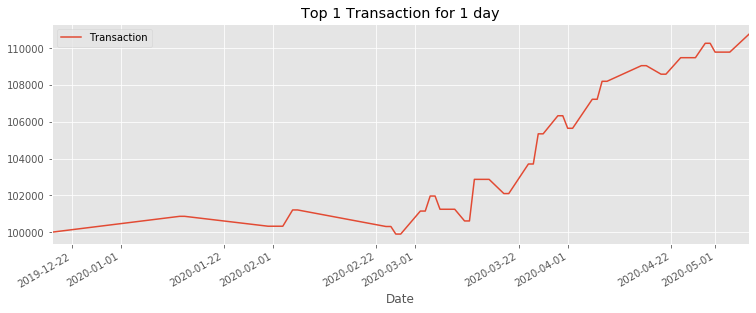

In [ ]:
d_date_price_1D_top1 = {'Date':dict_top10_date['0.026_0.012'], 'Transaction':dict_top10_price['0.026_0.012']}
df_date_price_1D_top1 = pd.DataFrame(d_date_price_1D_top1)
plt.figure(figsize=(12.5, 4.5))
df_date_price_1D_top1.plot( x = "Date", y = 'Transaction', figsize=(12.5, 4.5));
plt.title("Top 1 Transaction for 1 day")
plt.show()

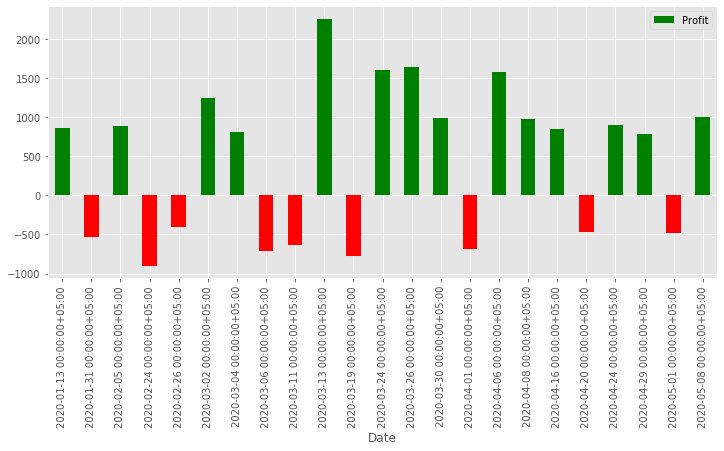

In [ ]:
# plt.figure(figsize=(12.5, 4.5))
# df_date_price_1D_top1.plot( x = "Date", y = 'Transaction')
# plt.title("Top 1 Transaction for 1 day")
# plt.show()
# plt.figure(figsize=(12.5, 4.5))
d_test_bar = {'Date':dict_top10_oncetimeDate['0.026_0.012'], 'Profit':dict_top10_oncetimeProfit['0.026_0.012']}
df_test_bar = pd.DataFrame(d_test_bar)
df_test_bar.plot.bar( x = "Date", y = 'Profit' , figsize=(12,5), color=(df_test_bar['Profit'] > 0).map({True: 'g', False: 'r'}));
# plt.title("Top 1 Transaction for 1 day")
# plt.show()

{'0_0': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], '1_1': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], '2_2': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], '3_3': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], '4_4': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], '5_5': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], '6_6': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], '7_7': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], '8_8': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], '9_9': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}
